## Feature selection

In [62]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
# selecfrommodel will help to select well feature
pd.set_option("display.max_columns", None)

In [63]:
dataset = pd.read_csv("final_x_train.csv")

In [64]:
dataset.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,208500,0.235294,0.666667,0.534333,0.485871,0.0,1.0,0.0,0.333333,0.0,0.000000,0.0,0.666667,0.5,0.0,1.0,1.00,0.625,0.428571,0.037037,0.083333,0.0,0.0,0.888889,0.888889,0.666667,0.12250,0.5,1.0,1.000000,0.75,0.666667,0.25,1.000000,0.322669,0.8,0.0,0.064212,0.266999,1.0,1.000000,1.0,1.0,0.335462,0.475501,0.0,0.644308,0.5,0.0,0.666667,0.5,0.500000,0.0,0.666667,0.555556,0.666667,0.000000,0.2,0.75,0.049020,0.666667,0.50,0.394245,1.0,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.5,0.666667,0.0,0.0,0.0
1,3,223500,0.235294,0.666667,0.555671,0.565599,0.0,1.0,0.5,0.333333,0.0,0.000000,0.0,0.666667,0.5,0.0,1.0,1.00,0.625,0.428571,0.051852,0.100000,0.0,0.0,0.888889,0.888889,0.666667,0.10125,0.5,1.0,1.000000,0.75,0.666667,0.50,1.000000,0.222121,0.8,0.0,0.185788,0.286962,1.0,1.000000,1.0,1.0,0.371561,0.482183,0.0,0.664879,0.5,0.0,0.666667,0.5,0.500000,0.0,0.666667,0.333333,0.666667,0.333333,0.6,0.75,0.068627,0.666667,0.50,0.437410,1.0,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.5,0.666667,0.0,0.0,0.0
2,4,140000,0.294118,0.666667,0.496479,0.519961,0.0,1.0,0.5,0.333333,0.0,0.333333,0.0,0.761905,0.5,0.0,1.0,1.00,0.625,0.428571,0.674074,0.600000,0.0,0.0,0.111111,0.333333,0.333333,0.00000,0.0,1.0,0.333333,0.50,1.000000,0.25,0.666667,0.098720,0.8,0.0,0.231164,0.235808,1.0,0.666667,1.0,1.0,0.393389,0.420935,0.0,0.646240,0.5,0.0,0.333333,0.0,0.500000,0.0,0.666667,0.444444,0.666667,0.333333,0.8,0.25,0.078431,0.333333,0.75,0.461871,1.0,1.0,1.0,0.000000,0.063985,0.855346,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.5,0.000000,0.0,0.0,0.0
3,5,250000,0.235294,0.666667,0.655603,0.631646,0.0,1.0,0.5,0.333333,0.0,0.666667,0.0,1.000000,0.5,0.0,1.0,1.00,0.750,0.428571,0.059259,0.133333,0.0,0.0,0.888889,0.888889,0.666667,0.21875,0.5,1.0,1.000000,0.75,0.666667,0.75,1.000000,0.299360,0.8,0.0,0.209760,0.357143,1.0,1.000000,1.0,1.0,0.481096,0.586303,0.0,0.763069,0.5,0.0,0.666667,0.5,0.666667,0.0,0.666667,0.666667,0.666667,0.333333,0.6,0.75,0.078431,0.666667,0.75,0.601439,1.0,1.0,1.0,0.260870,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.5,0.666667,0.0,0.0,0.0
4,7,307000,0.000000,0.666667,0.602008,0.535118,0.0,1.0,0.0,0.333333,0.0,0.000000,0.0,0.809524,0.5,0.0,1.0,0.75,0.750,0.428571,0.022222,0.033333,0.0,0.0,0.888889,0.888889,1.000000,0.11625,0.5,1.0,1.000000,1.00,0.666667,0.75,1.000000,0.625686,0.8,0.0,0.135702,0.525889,1.0,1.000000,1.0,1.0,0.677195,0.000000,0.0,0.639861,0.5,0.0,0.666667,0.0,0.500000,0.0,0.666667,0.444444,0.666667,0.333333,0.8,0.75,0.029412,0.666667,0.50,0.457554,1.0,1.0,1.0,0.346467,0.104205,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.636364,0.25,0.5,0.666667,0.0,0.0,0.0


In [65]:
#capture dependent variable
y = dataset[["SalePrice"]]
y.shape

(1150, 1)

In [66]:
#drop dependent variable and not importnant (ID) feature from dataset

x = dataset.drop(['Id',"SalePrice"], axis = 1)

In [67]:
## Apply Feature selection 
# first apply the lasso regression model and also select suitable alpha
# bigger the alpha less features that will be selected

feature_sel_model = SelectFromModel(Lasso(alpha = 0.005, random_state = 0))
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [68]:
feature_sel_model.get_support()

array([ True,  True,  True,  True, False,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True])

In [69]:
selected_feature = x.columns[(feature_sel_model.get_support())]
print(selected_feature)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnP

In [70]:
print(f"Total features: {x.shape[1]}")
print(f"Total Selected features: {len(selected_feature)}")
print(f"Feature with coefficient Zero: {np.sum(feature_sel_model.estimator_.coef_==0)}")

Total features: 82
Total Selected features: 75
Feature with coefficient Zero: 7


In [71]:
x=x[selected_feature]
x

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,GarageYrBltnan
0,0.235294,0.666667,0.534333,0.485871,1.0,0.0,0.333333,0.000000,0.0,0.666667,0.5,1.0,1.00,0.625,0.428571,0.037037,0.083333,0.0,0.888889,0.888889,0.666667,0.122500,0.5,1.0,1.000000,0.75,0.666667,0.25,1.000000,0.322669,0.8,0.000000,0.064212,0.266999,1.0,1.000000,1.0,1.0,0.335462,0.475501,0.0,0.644308,0.5,0.0,0.666667,0.5,0.500000,0.0,0.666667,0.555556,0.666667,0.000000,0.2,0.75,0.049020,0.666667,0.50,0.394245,1.0,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.5,0.666667,0.0,0.0
1,0.235294,0.666667,0.555671,0.565599,1.0,0.5,0.333333,0.000000,0.0,0.666667,0.5,1.0,1.00,0.625,0.428571,0.051852,0.100000,0.0,0.888889,0.888889,0.666667,0.101250,0.5,1.0,1.000000,0.75,0.666667,0.50,1.000000,0.222121,0.8,0.000000,0.185788,0.286962,1.0,1.000000,1.0,1.0,0.371561,0.482183,0.0,0.664879,0.5,0.0,0.666667,0.5,0.500000,0.0,0.666667,0.333333,0.666667,0.333333,0.6,0.75,0.068627,0.666667,0.50,0.437410,1.0,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.5,0.666667,0.0,0.0
2,0.294118,0.666667,0.496479,0.519961,1.0,0.5,0.333333,0.333333,0.0,0.761905,0.5,1.0,1.00,0.625,0.428571,0.674074,0.600000,0.0,0.111111,0.333333,0.333333,0.000000,0.0,1.0,0.333333,0.50,1.000000,0.25,0.666667,0.098720,0.8,0.000000,0.231164,0.235808,1.0,0.666667,1.0,1.0,0.393389,0.420935,0.0,0.646240,0.5,0.0,0.333333,0.0,0.500000,0.0,0.666667,0.444444,0.666667,0.333333,0.8,0.25,0.078431,0.333333,0.75,0.461871,1.0,1.0,1.0,0.000000,0.063985,0.855346,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.5,0.000000,0.0,0.0
3,0.235294,0.666667,0.655603,0.631646,1.0,0.5,0.333333,0.666667,0.0,1.000000,0.5,1.0,1.00,0.750,0.428571,0.059259,0.133333,0.0,0.888889,0.888889,0.666667,0.218750,0.5,1.0,1.000000,0.75,0.666667,0.75,1.000000,0.299360,0.8,0.000000,0.209760,0.357143,1.0,1.000000,1.0,1.0,0.481096,0.586303,0.0,0.763069,0.5,0.0,0.666667,0.5,0.666667,0.0,0.666667,0.666667,0.666667,0.333333,0.6,0.75,0.078431,0.666667,0.75,0.601439,1.0,1.0,1.0,0.260870,0.153565,0.000000,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.5,0.666667,0.0,0.0
4,0.000000,0.666667,0.602008,0.535118,1.0,0.0,0.333333,0.000000,0.0,0.809524,0.5,1.0,0.75,0.750,0.428571,0.022222,0.033333,0.0,0.888889,0.888889,1.000000,0.116250,0.5,1.0,1.000000,1.00,0.666667,0.75,1.000000,0.625686,0.8,0.000000,0.135702,0.525889,1.0,1.000000,1.0,1.0,0.677195,0.000000,0.0,0.639861,0.5,0.0,0.666667,0.0,0.500000,0.0,0.666667,0.444444,0.666667,0.333333,0.8,0.75,0.029412,0.666667,0.50,0.457554,1.0,1.0,1.0,0.346467,0.104205,0.000000,0.0,0.0,1.0,1.0,0.0,0.636364,0.25,0.5,0.666667,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,0.000000,1.000000,0.511986,0.452648,0.5,0.0,0.333333,0.000000,0.0,0.809524,0.5,1.0,0.75,0.625,0.428571,0.037037,0.066667,0.0,0.888889,0.888889,0.333333,0.000000,0.5,1.0,1.000000,0.75,0.666667,0.25,1.000000,0.187386,0.8,0.000000,0.347175,0.380848,1.0,1.000000,1.0,1.0,0.513271,0.000000,0.0,0.484974,0.5,0.0,0.666667,0.0,0.333333,0.0,0.666667,0.333

In [72]:
x.to_csv("featured_x_train.csv", index = False)

In [73]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20 )

In [88]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(920, 75)
(230, 75)
(920, 1)
(230, 1)


In [89]:
model_reg = linear_model.LinearRegression()
model_reg.fit(x_train, y_train)

LinearRegression()

In [90]:
model_reg.coef_

array([[-1.68026450e+04, -1.13478268e+04, -7.66340274e+03,
         3.96552499e+04,  4.44472131e+03, -1.14213199e+03,
         1.04711920e+03,  4.86907046e+03,  4.39442214e+03,
         2.78002070e+04,  1.81983616e+04, -5.01582520e+03,
        -1.31557558e+03,  6.73687041e+04,  3.66262669e+04,
        -1.87624691e+04,  3.19016347e+03,  7.28522133e+03,
         1.49906748e+04, -1.23809779e+04, -4.24952187e+03,
         3.51677471e+04,  1.77520778e+04,  8.57085329e+03,
         2.77761782e+03,  6.80387943e+03, -3.21984566e+04,
         1.70237835e+04,  1.92084035e+03,  9.84925192e+16,
        -7.26428014e+02,  6.63519074e+16,  1.05154719e+17,
        -1.44317649e+17,  1.45888786e+04,  1.01334683e+03,
        -8.49129791e+02, -6.09402323e+03,  8.24679875e+04,
         1.04164552e+05,  1.67171941e+04, -4.08944692e+04,
        -3.85886413e+02, -4.29987792e+03,  1.27862058e+04,
         6.28796265e+03, -5.62670053e+04, -4.68842783e+04,
         3.24127862e+04,  6.04591500e+04,  1.17030172e+0

In [91]:
model_reg.intercept_

array([-91419.6576087])

In [92]:
model_reg.score(x_test,y_test)

0.9014865511585411

In [93]:
x_test.shape

(230, 75)

In [94]:
predicted_val  = model_reg.predict(x_test)
predicted_val

array([[178646.51939733],
       [115991.64853491],
       [233395.30910524],
       [234852.40959266],
       [227280.72634427],
       [ 98544.78222054],
       [304464.24636954],
       [136932.19423672],
       [139818.88557041],
       [187851.86051332],
       [198670.61338856],
       [173426.2776886 ],
       [231087.55939236],
       [159724.30404613],
       [310144.09444409],
       [ 97071.84567761],
       [268603.54431233],
       [260794.70839706],
       [205768.79613723],
       [193045.57781117],
       [157551.30878685],
       [147450.89438338],
       [160012.48243724],
       [205748.87733143],
       [283644.39141357],
       [223890.47102194],
       [157698.96740519],
       [129530.22304568],
       [125974.49329867],
       [171717.95646582],
       [239387.90568044],
       [144079.7697296 ],
       [103312.53458643],
       [113397.60341488],
       [379081.49811056],
       [231817.81342576],
       [171886.41438881],
       [118027.62555139],
       [1345

In [95]:
actual_values =y_test.values

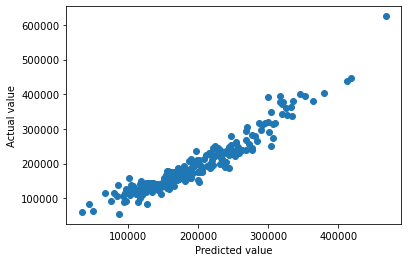

In [96]:
plt.scatter(predicted_val,actual_values)
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.show()

In [97]:
import pickle

In [98]:
with open("model_pickle","wb") as f:
    pickle.dump(model_reg,f)

In [99]:
with open("model_pickle","rb") as f:
    model = pickle.load(f)

In [101]:
model.predict(x_test)

array([[178646.51939733],
       [115991.64853491],
       [233395.30910524],
       [234852.40959266],
       [227280.72634427],
       [ 98544.78222054],
       [304464.24636954],
       [136932.19423672],
       [139818.88557041],
       [187851.86051332],
       [198670.61338856],
       [173426.2776886 ],
       [231087.55939236],
       [159724.30404613],
       [310144.09444409],
       [ 97071.84567761],
       [268603.54431233],
       [260794.70839706],
       [205768.79613723],
       [193045.57781117],
       [157551.30878685],
       [147450.89438338],
       [160012.48243724],
       [205748.87733143],
       [283644.39141357],
       [223890.47102194],
       [157698.96740519],
       [129530.22304568],
       [125974.49329867],
       [171717.95646582],
       [239387.90568044],
       [144079.7697296 ],
       [103312.53458643],
       [113397.60341488],
       [379081.49811056],
       [231817.81342576],
       [171886.41438881],
       [118027.62555139],
       [1345